Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

## Name: Ciro Salcedo

# HW 8:  Linear Algebra Part 2

## Question 1

We know that interpolation using equispaced points is not ideal but we can also show that it is ill-conditioned.  To illustrate this let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ repectively.

**(a)** [10] Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.

$$
\mathcal{P} = \begin{bmatrix}
        \mathcal{P}(x_1) \\
        \mathcal{P}(x_2) \\    
        ... \\
        \mathcal{P}(x_n) \\        
    \end{bmatrix}.
$$

The matrix A maps $\mathcal{P}(x)$ to $\mathcal{P}(y)$

$$
 A \mathcal{P}(x) =\mathcal{P}(y)
$$ 

$\mathcal{P}(y)$ can be written as the dot product of its Vandermonde matrix and the coefficients of the interpolating polynomial, which I will generically call p

$$
 V_y p =\mathcal{P}(y)
$$ 

This can be similarly done for $\mathcal{P}(x)$

$$
  V_x p =\mathcal{P}(x)
$$ 

Returning to my original equation

$$
 A \mathcal{P}(x) =\mathcal{P}(y) = V_y p = A V_x p
$$ 

Therefore

$$
A = V_yV_x^{-1}
$$


**(b)** [5]) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are known as the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

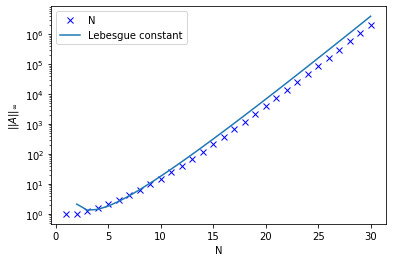

In [2]:
n = 30
N_mat=[]
for i in range(1, n+1):
    x = numpy.linspace(-1, 1, i)
    V_x = numpy.vander(x)
    y = numpy.linspace(-1, 1, 2 * i - 1)
    V_y = numpy.vander(y)[:, i-1:]
    
    A = numpy.dot(V_y, numpy.linalg.inv(V_x))
    N_mat.append(numpy.linalg.norm(A, ord=numpy.infty))
    
n_1 = numpy.arange(2, n+1)
x = numpy.arange(1,n+1)

plt.semilogy(x, N_mat,"bx",label="N")
plt.semilogy(n_1[0:], 2.0**n_1[0:] / (numpy.exp(1) * (n_1[0:] - 1.0) * numpy.log(n_1[0:])), label = 'Lebesgue constant')
        
plt.xlabel("N")
plt.ylabel("$||A||_\infty$")
plt.legend()



plt.show()

<ipython-input-3-9cee26b85c10>:15: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(N[0:], 2.0**N[0:] / (numpy.exp(1) * (N[0:] - 1.0) * numpy.log(N[0:])), label = 'Lebesgue constant')


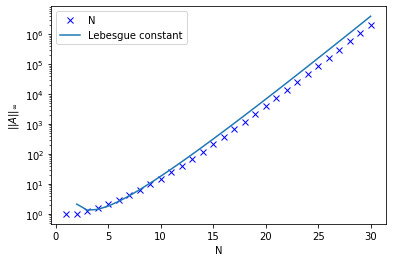

In [3]:
n = 30
N = numpy.arange(1,n+1)
N_mat=[]
for i in N:
    x = numpy.linspace(-1, 1, i)
    V_x = numpy.vander(x)
    y = numpy.linspace(-1, 1, 2 * i - 1)
    V_y = numpy.vander(y)[:, i-1:]
    
    A = numpy.dot(V_y, numpy.linalg.inv(V_x))
    N_mat.append(numpy.linalg.norm(A, ord=numpy.infty))
    

plt.semilogy(N, N_mat,"bx",label="N")     
plt.semilogy(N[0:], 2.0**N[0:] / (numpy.exp(1) * (N[0:] - 1.0) * numpy.log(N[0:])), label = 'Lebesgue constant')

plt.xlabel("N")
plt.ylabel("$||A||_\infty$")
plt.legend()


plt.show()

**(c)** [10] Derive a general way to compute the $\infty$-norm condition number $\kappa$ of the problem of interpolating the function $f(x) = 1$.  Plot the result for $n=1,2,\ldots,30$ and $m=2n-1$.  Hint:  Use the expression we found involving the Jacobian.

$f(x) = \mathcal{P}(x) = 1$, then for ${x_i}$

$$
Ax = \begin{bmatrix}
        1 \\
        1 \\    
        ... \\
        1 \\        
    \end{bmatrix}.
$$

Thus, $||AA||_\infty = ||x||_\infty = 1$

From the expression using the Jacobian:

$$
     \kappa = ||J(x)||_\infty \times (\frac{||Ax||_\infty }{||x||_\infty })^-1 =  ||J(x)||_\infty
$$

As $||J(x)||_\infty = ||A||_\infty$:

$$
     \kappa = ||A||_\infty
$$

Text(0, 0.5, '$\\kappa$')

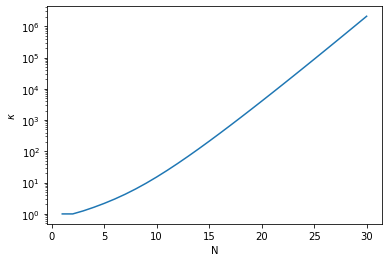

In [4]:
n = 30
N = numpy.arange(1,n+1)
k_mat=[]
for i in N:
    x = numpy.linspace(-1, 1, i)
    V_x = numpy.vander(x)
    y = numpy.linspace(-1, 1, 2 * i - 1)
    V_y = numpy.vander(y)[:, i-1:]
    
    k = numpy.linalg.norm(numpy.dot(V_y, numpy.linalg.inv(V_x)), ord=numpy.infty )
    k_mat.append(k)
plt.semilogy(N,k_mat)
    

plt.xlabel("N")
plt.ylabel("$\kappa$")


## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture on Gaussian elimination when doing this question.

**(a)** [10] By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

$$
    L = \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & * & 1
    \end{bmatrix}.
$$

$$
    U = \begin{bmatrix}
        4 & 8 & 1 \\
        0 & * & * \\
        0 & 0 & *
    \end{bmatrix}.
$$

We then do $R_2 - 2R_1$
and $R_3 - 4R_1$
$$
    U = \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & *
    \end{bmatrix}.
$$

$$
    U = \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}.
$$

We also do $R_3 - R_2$
$$
    L = \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1
    \end{bmatrix}.
$$


**(b)** [10] Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [5]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    # YOUR CODE HERE
    U = A.copy()
    L = numpy.identity(A.shape[0])
    P = numpy.identity(A.shape[0])
    for n in range(A.shape[0]):
        pivot_i = numpy.argmax(numpy.abs(U[n:, n])) + n
       
        swap_rows(pivot_i, n, U, column_indices=(n, A.shape[0]))
        swap_rows(pivot_i, n, L, column_indices=(0, n))
        swap_rows(pivot_i, n, P)

        for j in range(n + 1, A.shape[0]):
            L[j, n] = U[j, n] / U[n, n]
            U[j, n:A.shape[0]] = U[j, n:A.shape[0]] - L[j, n] * U[n, n:A.shape[0]]

    return P, L, U

In [6]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** [10] For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [7]:
def solve(A, b):
    P, L, U = LU_factorization(A)
    
    #first pivot L
    y = []
    y_matrix = P*b
    for n in range(len(b)):
        y.append(max(y_matrix[n]))
    
    #perform forward substitution with L
    y = f_sub(L, y)
    #perform backward substitution with U
    x = b_sub(U, y)    
    
    return x

def f_sub(L, b):
    y = b
    for i in range(L.shape[0]):
        for j in range(i):
            y[i] = b[i] - L[i,j]*b[j]    
    return y

def b_sub(U, b):
    x = b
    for i in range(U.shape[0]-1,-1,-1):
        for j in range(i+1, U.shape[0]):
            x[i] -= U[i,j]*b[j]
        x[i] = x[i]/U[i,i]
    return x

In [8]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!


## Question 3

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$
The true solution of this system is $$x^T = [1, -1]$$.  Consider for the following questions the approximate solutions
$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$
and define the residual $r(y)$ as
$$
    r(y) = b - A y.
$$

**(a)** [10] Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [9]:
A = numpy.matrix([[0.780, 0.563], [0.913, 0.659]])
b = numpy.matrix([0.217, 0.254]).T

x1 = numpy.matrix([0.999, -1.001]).T
x2 = numpy.matrix([0.341, -0.087]).T

r1 = b - numpy.dot(A, x1)
r2 = b - numpy.dot(A, x2)

print("r(x1) norms: 1-norm = {}, 2-norm = {}, inf-norm = {}"
      .format(numpy.linalg.norm(r1, 1), numpy.linalg.norm(r1, 2), numpy.linalg.norm(r1, numpy.inf)))
print("r(x2) norms: 1-norm = {}, 2-norm = {}, inf-norm = {}"
      .format(numpy.linalg.norm(r2, 1), numpy.linalg.norm(r2, 2), numpy.linalg.norm(r2, numpy.inf)))

r(x1) norms: 1-norm = 0.0029149999999999177, 2-norm = 0.002067566927574483, inf-norm = 0.0015720000000000178
r(x2) norms: 1-norm = 9.99999999945489e-07, 2-norm = 9.99999999945489e-07, inf-norm = 9.99999999945489e-07


$r(x_2)$ has smaller residuals regardless of norm compared to $r(x_1)$

**(b)** [10] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [10]:
A = numpy.matrix([[0.780, 0.563], [0.913, 0.659]])
A_i = numpy.linalg.inv(A)

A_l2 = numpy.linalg.norm(A, 2)
A_linf = numpy.linalg.norm(A, numpy.inf)
A_i_l2 = numpy.linalg.norm(A_i, 2)
A_i_linf = numpy.linalg.norm(A_i, numpy.inf)

print("A norms: L2 norm = {}, Linf norm = {}".format(A_l2, A_linf))
print("A inv norms: L2 norm = {}, Linf norm = {}".format(A_i_l2, A_i_linf))
print("condition number: L2 norm = {}, Linf norm = {}".format(A_l2 * A_i_l2, A_linf * A_i_linf))

A norms: L2 norm = 1.4809520586432041, Linf norm = 1.572
A inv norms: L2 norm = 1480952.0584615201, Linf norm = 1692999.9997923018
condition number: L2 norm = 2193218.999730479, Linf norm = 2661395.9996734983


**(c)** [15] Explain the behavior from part (a) using the results of part (b) discussing how condition numbers play a role in the problem above.  Hint:  Think about the problem where only the vector $x$ is perturbed by some small amount $\delta x$

The conidition number of A is substantailly greater than the magnitude of perturbations from part a, meaning that Ax and the residuals change significantly for a small change in input $x_1$. The $x_2$ results in smaller residuals as it may be better to be above the true solution than below it when findiing a solution. 